In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os

import cv2

from glob import glob
from matplotlib.patches import  Polygon
from matplotlib.collections import PatchCollection
from scipy.stats import linregress
from scipy.spatial.distance import cdist

from datetime import datetime


from utils import geometry
from utils import fileio

In [36]:
tm_spot_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\unstretched\\20231019_1_IP_GFPCAAX-CheHis_uu_0p5_SumP/tm_spots_small.csv', skiprows=[1,2,3])
tm_track_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\unstretched\\20231019_1_IP_GFPCAAX-CheHis_uu_0p5_SumP/tm_tracks_small.csv', skiprows=[1,2,3])
tm_edge_dat=pd.read_csv('C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\unstretched\\20231019_1_IP_GFPCAAX-CheHis_uu_0p5_SumP/tm_edges_small.csv', skiprows=[1,2,3])

In [37]:
mat_dir='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\unstretched\\20231019_1_IP_GFPCAAX-CheHis_uu_0p5_SumP\\5min_int\\Matrices'
save_folder='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\Movies_to_track\\Output/'

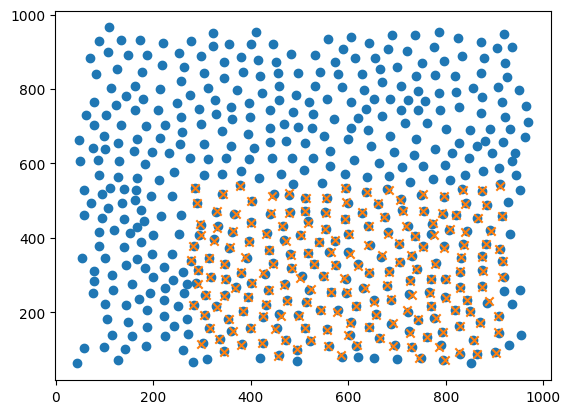

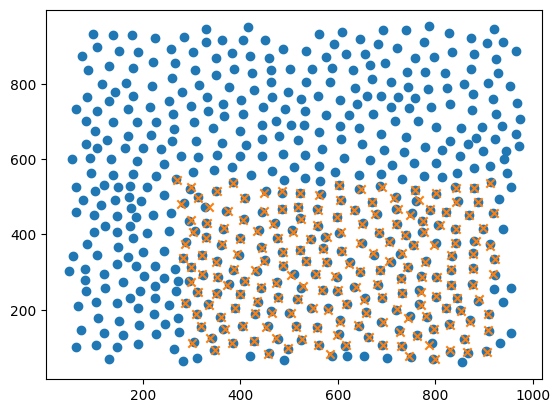

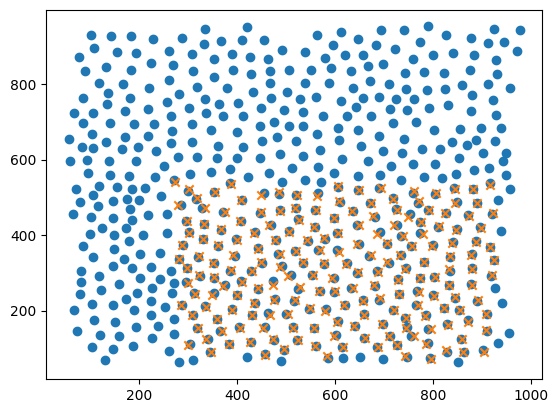

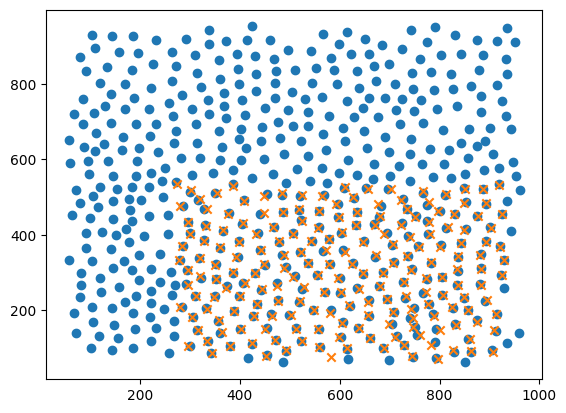

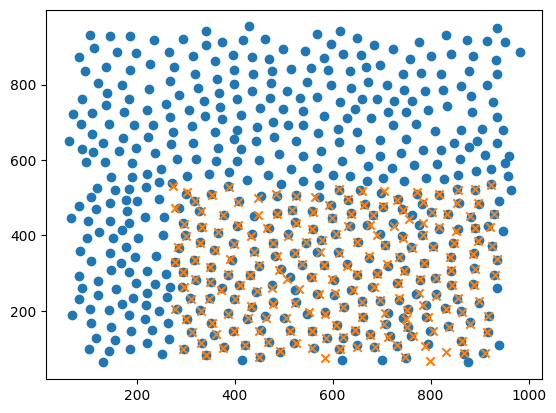

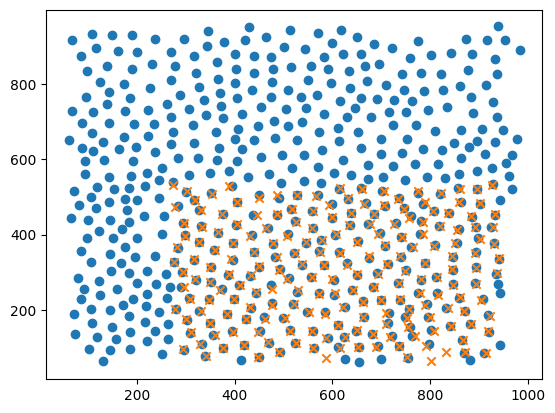

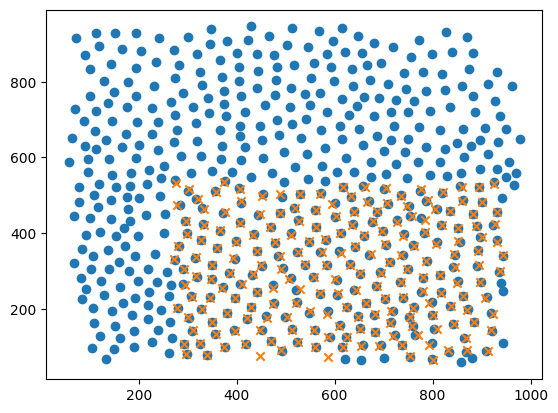

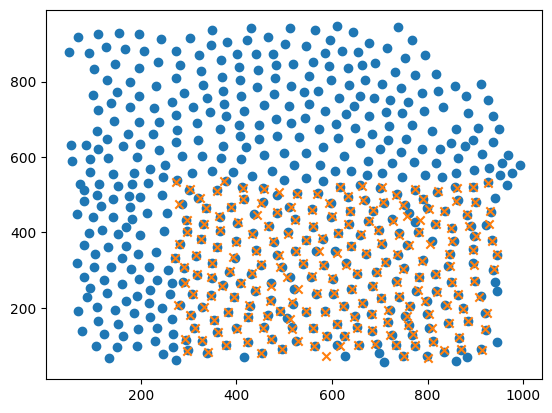

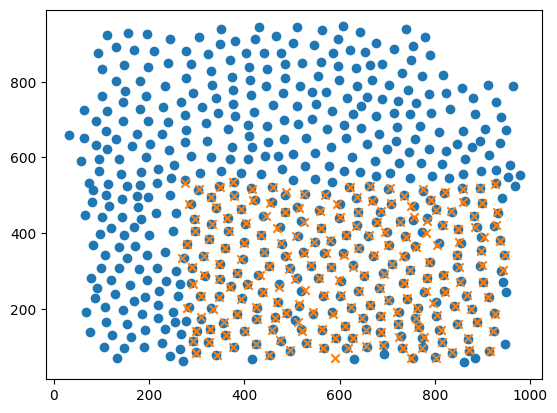

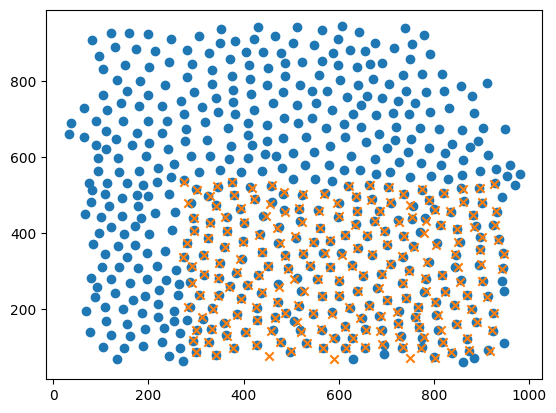

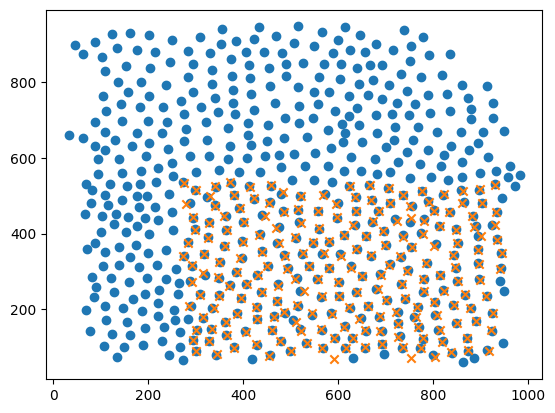

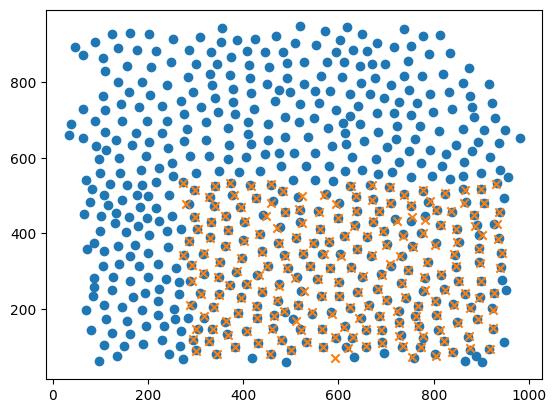

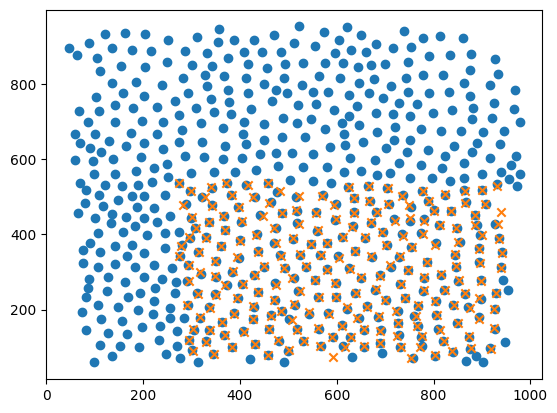

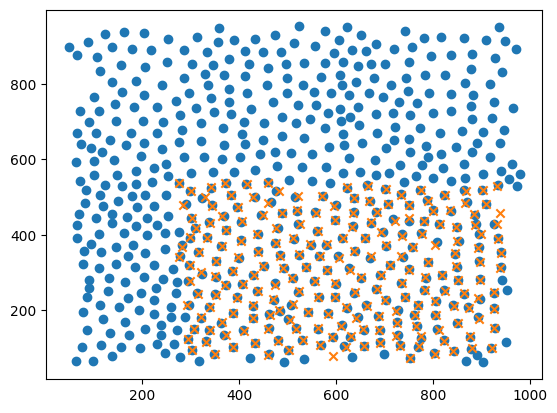

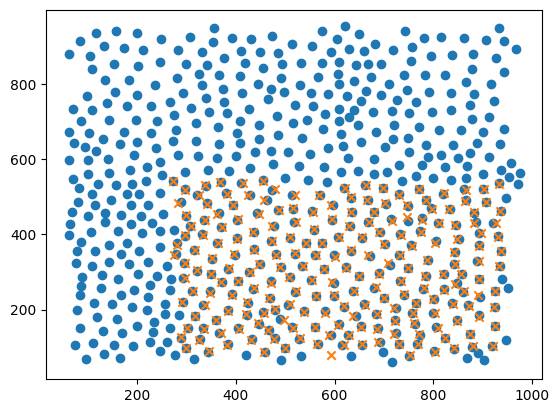

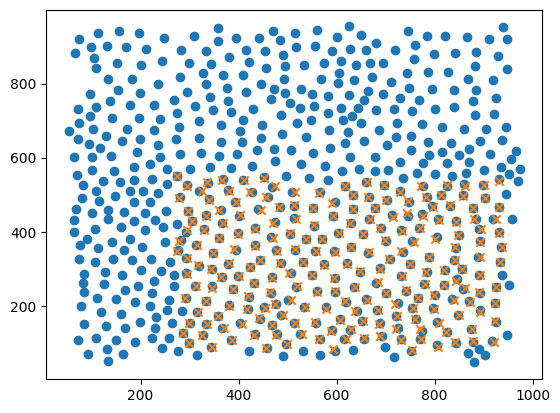

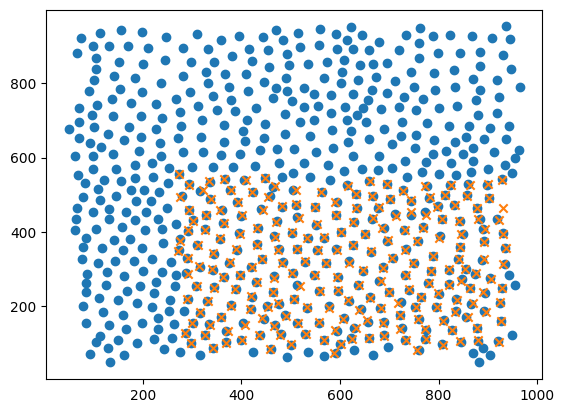

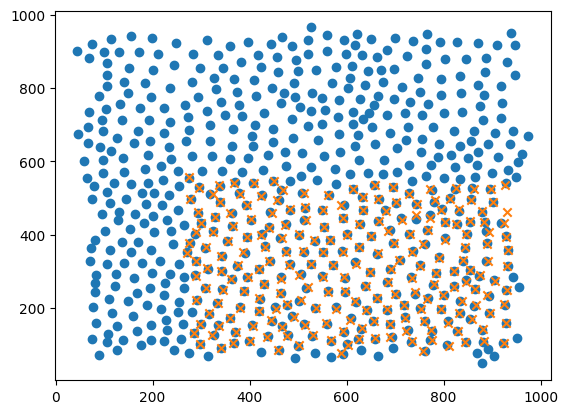

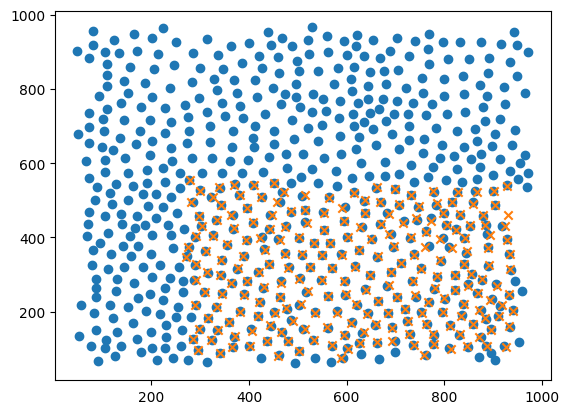

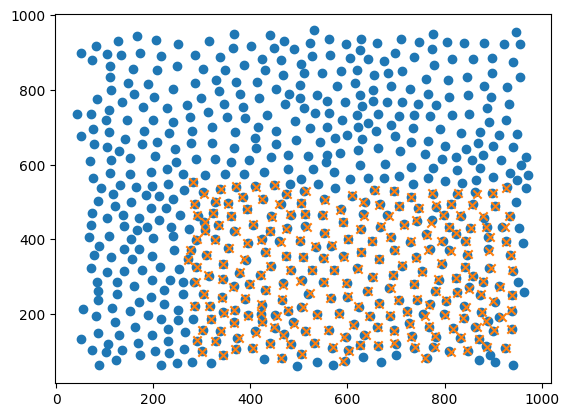

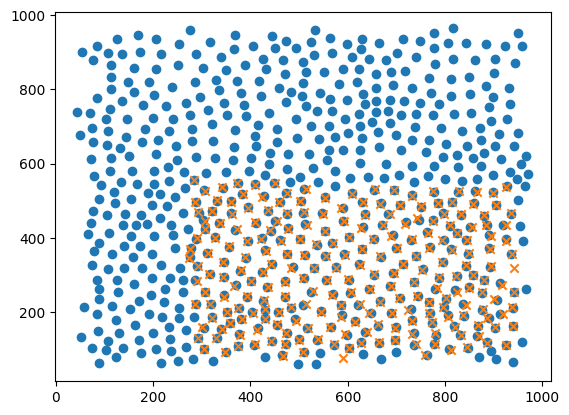

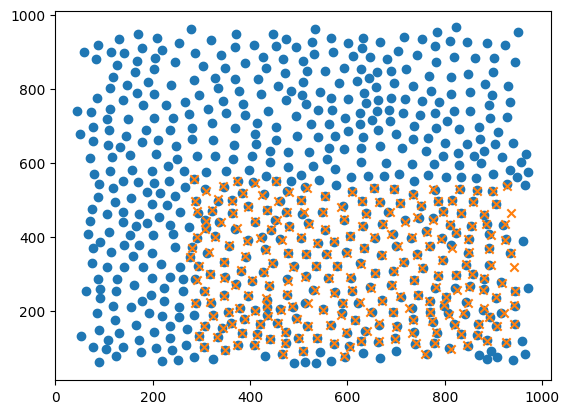

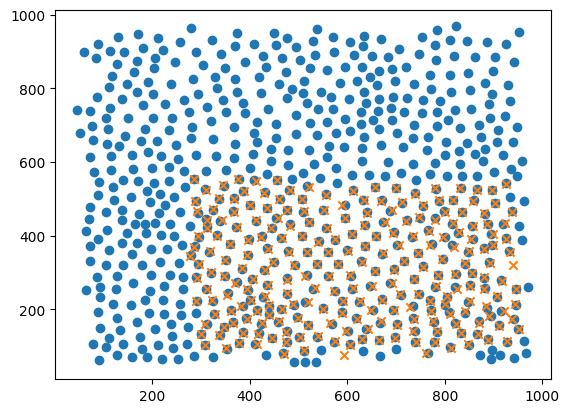

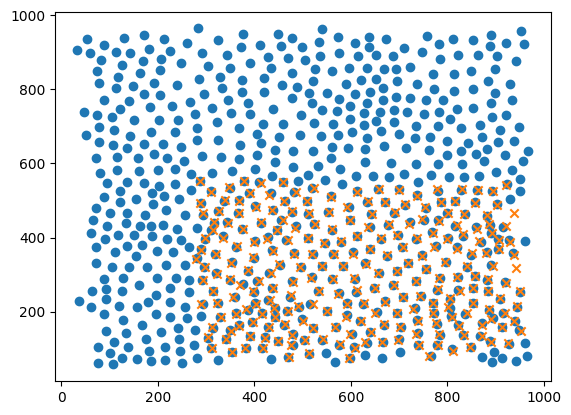

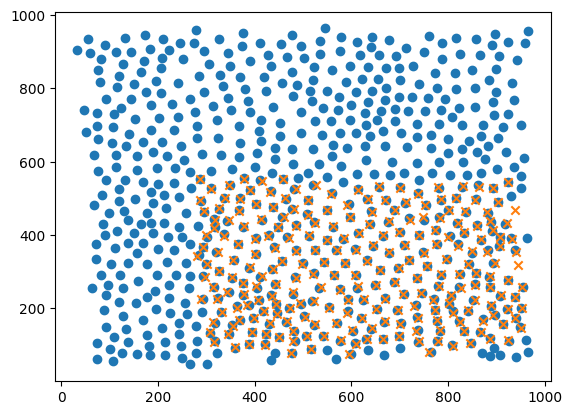

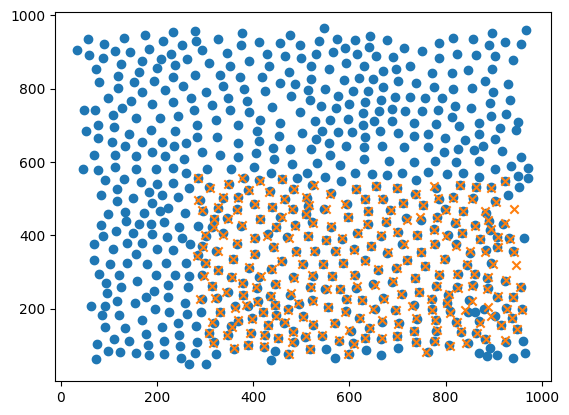

In [38]:
frames=np.linspace(1,126, 26).astype(int)
for i in frames:
    tm=tm_spot_dat[tm_spot_dat.FRAME==int((i-1)/5)][['ID','TRACK_ID', 'POSITION_X', 'POSITION_Y', 'FRAME']]

    A=np.loadtxt(glob(mat_dir+'/*Matrix_A*fr*'+str(i)+'_trace.txt')[0])
    B=np.loadtxt(glob(mat_dir+'/*Matrix_B*fr*'+str(i)+'_trace.txt')[0])
    C=np.loadtxt(glob(mat_dir+'/*Matrix_C*fr*'+str(i)+'_trace.txt')[0])
    R=np.loadtxt(glob(mat_dir+'/*Matrix_R*fr*'+str(i)+'_trace.txt')[0])

    #dat=pd.read_csv(dat_files[i])

    cell_edge_count=geometry.get_edge_count(B)
    cell_centres=geometry.get_cell_centres(C,R,cell_edge_count)

    scale_factor=1

    cc=np.vstack((cell_centres[:,0],cell_centres[:,1])).T
    tm_cc=scale_factor*np.vstack((tm.POSITION_X, tm.POSITION_Y)).T

    plt.scatter(cc[:,0], cc[:,1])
    plt.scatter(tm_cc[:,0], tm_cc[:,1], marker='x')

  
    plt.show()

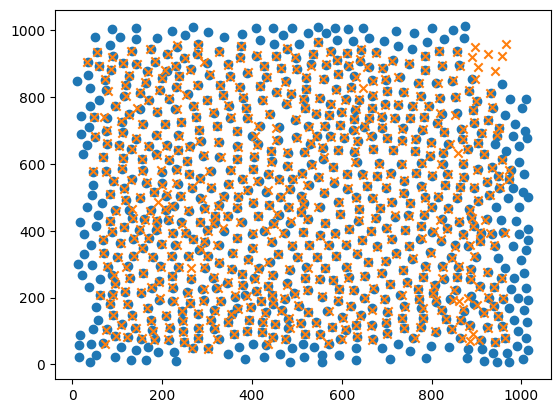

In [34]:
    plt.scatter(tm_cc[:,0], tm_cc[:,1])
    plt.scatter(cc[:,0], cc[:,1], marker='x')
  
    plt.show()